In [ ]:
import pandas as pd
import networkx as nx

# Load datasets
edges_df = pd.read_csv("/content/sample_data/musae_RU_edges.csv")  # Replace with your edges file path
target_df = pd.read_csv("/content/sample_data/musae_RU_target.csv")  # Replace with your target file path

# Create the graph
G = nx.Graph()
G.add_edges_from(edges_df.values)

# Add attributes to the nodes (if needed)
for _, row in target_df.iterrows():
    node_id = row['id']
    attributes = {
        'views': row['views'],
        'partner': row['partner'],
        'days': row['days'],
        'mature': row['mature']
    }
    if node_id in G:
        nx.set_node_attributes(G, {node_id: attributes})


In [ ]:
import numpy as np

def influence_rank(graph, max_iter=100, damping=0.85, tol=1e-6):
    """
    Influence Rank algorithm implementation.
    :param graph: A NetworkX graph.
    :param max_iter: Maximum number of iterations.
    :param damping: Damping factor (similar to PageRank).
    :param tol: Tolerance for convergence.
    :return: A dictionary with nodes as keys and Influence Rank scores as values.
    """
    N = len(graph)
    if N == 0:
        return {}

    # Initialize ranks (uniform distribution)
    ranks = {node: 1 / N for node in graph}
    damping_value = (1 - damping) / N

    for iteration in range(max_iter):
        prev_ranks = ranks.copy()
        for node in graph:
            rank_sum = sum(prev_ranks[neighbor] / len(list(graph.neighbors(neighbor)))
                           for neighbor in graph.neighbors(node))
            ranks[node] = damping_value + damping * rank_sum

        # Check for convergence
        if sum(abs(ranks[node] - prev_ranks[node]) for node in graph) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

    return ranks

# Compute Influence Rank
influence_scores = influence_rank(G)

# Sort by score to find top influencers
ranked_influencers = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)

# Display top 10 influencers
print("Top 10 Influencers by Influence Rank:")
for rank, (node, score) in enumerate(ranked_influencers[:10], start=1):
    print(f"Rank {rank}: Node {node}, Influence Rank Score: {score}")


Converged after 29 iterations.
Top 10 Influencers by Influence Rank:
Rank 1: Node 1800, Influence Rank Score: 0.015163861131570444
Rank 2: Node 646, Influence Rank Score: 0.009121470147523333
Rank 3: Node 2425, Influence Rank Score: 0.007802244925573039
Rank 4: Node 1725, Influence Rank Score: 0.007401649489529428
Rank 5: Node 598, Influence Rank Score: 0.007191903117247628
Rank 6: Node 568, Influence Rank Score: 0.006469464843247259
Rank 7: Node 912, Influence Rank Score: 0.006123869881051318
Rank 8: Node 1276, Influence Rank Score: 0.0057899768250168505
Rank 9: Node 1916, Influence Rank Score: 0.005415404786278185
Rank 10: Node 342, Influence Rank Score: 0.0050113755354431145


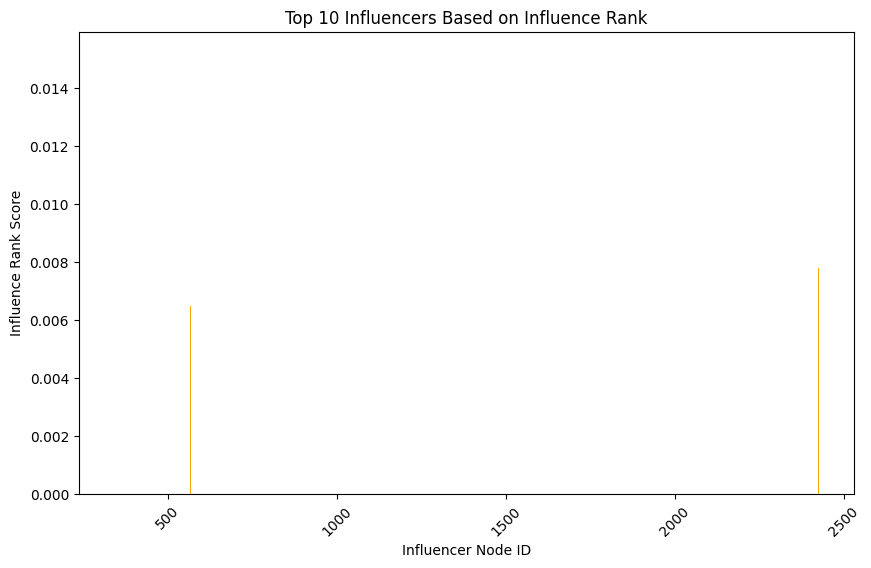

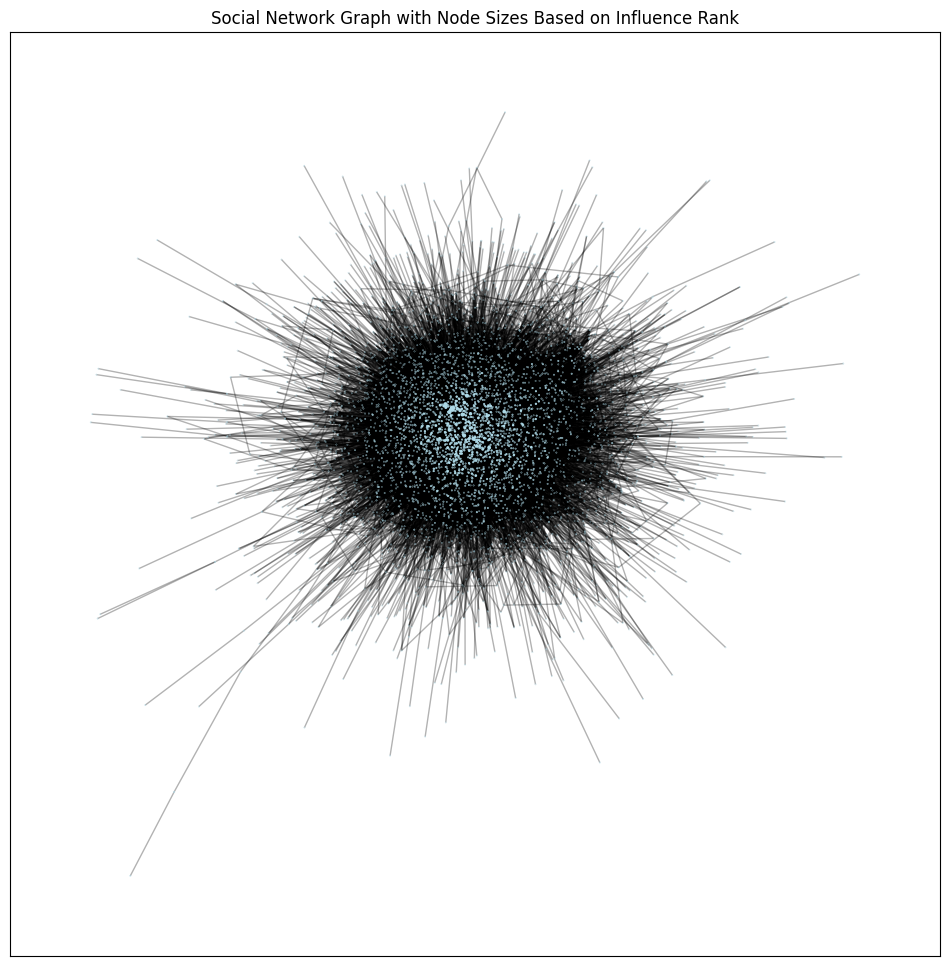

In [ ]:
import matplotlib.pyplot as plt

# Plot the top influencers
top_influencers = ranked_influencers[:10]
top_nodes = [node for node, score in top_influencers]
top_scores = [score for node, score in top_influencers]

plt.figure(figsize=(10, 6))
plt.bar(top_nodes, top_scores, color='orange')
plt.xlabel("Influencer Node ID")
plt.ylabel("Influence Rank Score")
plt.title("Top 10 Influencers Based on Influence Rank")
plt.xticks(rotation=45)
plt.show()

# Visualize the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
node_sizes = [500 * influence_scores[node] for node in G.nodes]  # Scale node size by Influence Rank
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="lightblue")
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Social Network Graph with Node Sizes Based on Influence Rank")
plt.show()
